# Some Data Visualizations

In [3]:
import pandas as pd
labels = []
data_dir = "/Users/samskanderi/Documents/Research_Project/SWANSF/code/2_Labels/"

for i in range(1,6):
    labels.append(pd.read_csv(data_dir + "partition" + str(i) + "_labels.csv"))

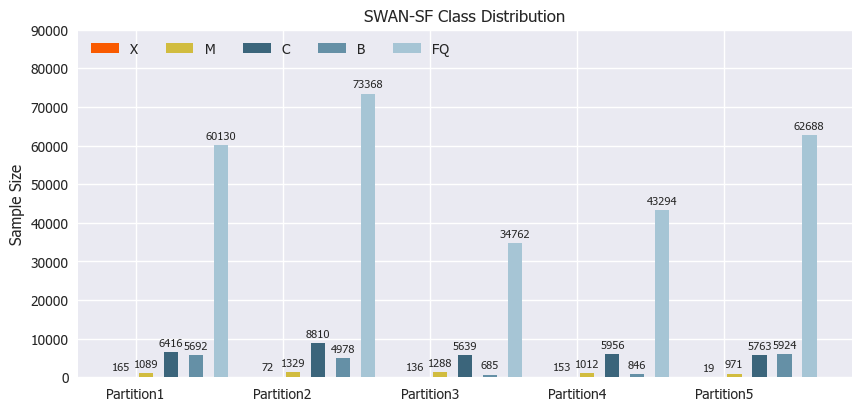

In [4]:
# Create dictionary for counts of each flare type
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

flare_types = {"X": [0,0,0,0,0], "M": [0,0,0,0,0], "C": [0,0,0,0,0], "B": [0,0,0,0,0], "FQ": [0,0,0,0,0]}
color = ['#f95a00','#d1bc3f','#3b657b','#6590a6','#a6c5d5']
plt.style.use('seaborn-v0_8')


font = {'family' : 'Tahoma',
        'weight' : 'normal',
        'size'   : 8}

matplotlib.rc('font', **font)

    
for i in range(1,6):

    # For each objects flare type sort into M, X, C, B, or FQ, otherwise skip
    for j in labels[i-1]['FLARE_TYPE']:
        if "M" in j:
            flare_types["M"][i-1] +=1
        elif "X" in j:
            flare_types["X"][i-1] +=1
        elif "C" in j:
            flare_types["C"][i-1] +=1
        elif "B" in j:
            flare_types["B"][i-1] +=1
        elif "FQ" in j:
            flare_types["FQ"][i-1] +=1
        else:
            continue


group = ("Partition1", "Partition2", "Partition3", "Partition4", "Partition5")

x = np.arange(len(group))  # the label locations
width = 0.10  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', sharey=True,
  figsize=(8.5, 4))

for attribute, measurement in flare_types.items():
    offset = width * multiplier * 1.7
    rects = ax.bar(x + offset, measurement, width, label=attribute, color = color[multiplier] )
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sample Size')
ax.set_title('SWAN-SF Class Distribution')
ax.set_xticks(x + width, group)
ax.legend(loc='upper left', ncols=5)
ax.set_ylim(0, 90000)

plt.show()

/var/folders/fx/gjhbmrbj5jn295_9wrqpbsv80000gn/T/ipykernel_43817/831764987.py:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(group, fontsize=12)


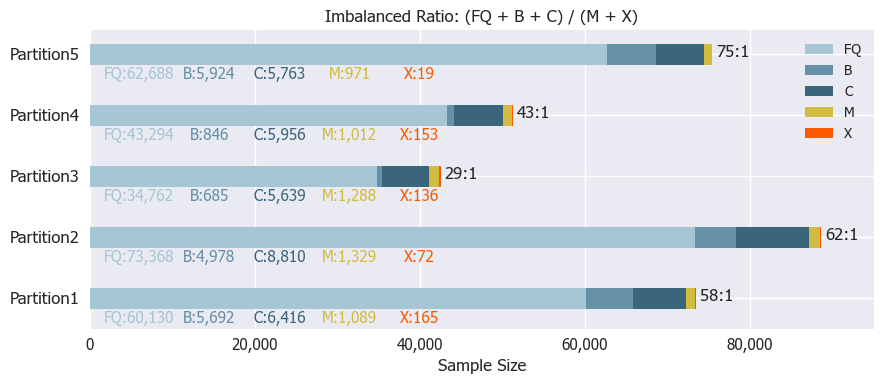

In [22]:
flare_types = {"FQ": [0,0,0,0,0], "B": [0,0,0,0,0], "C": [0,0,0,0,0], "M": [0,0,0,0,0], "X": [0,0,0,0,0]}
imbalanced = {1: [0,0], 2: [0,0], 3: [0,0], 4: [0,0], 5: [0,0]}

from matplotlib.ticker import FuncFormatter

def with_commas(x, pos):
    """
    Args:
        x: The value
        pos: The position (not used here but necessary for the function signature)
    Returns:
        The formatted string with commas.
    """
    return f'{int(x):,}'


plt.style.use('seaborn-v0_8')


font = {'family' : 'Tahoma',
        'weight' : 'normal',
        'size'   : 12,}

matplotlib.rc('font', **font)

color = ['#a6c5d5','#6590a6','#3b657b','#d1bc3f','#f95a00']
group = ["Partition1", "Partition2", "Partition3", "Partition4", "Partition5"]

    
for i in range(1,6):

    # For each objects flare type sort into M, X, C, B, or FQ, otherwise skip
    for j in labels[i-1]['FLARE_TYPE']:
        if "M" in j:
            flare_types["M"][i-1] +=1
            imbalanced[i][0] +=1
        elif "X" in j:
            flare_types["X"][i-1] +=1
            imbalanced[i][0] +=1
        elif "C" in j:
            flare_types["C"][i-1] +=1
            imbalanced[i][1] +=1
        elif "B" in j:
            flare_types["B"][i-1] +=1
            imbalanced[i][1] +=1
        elif "FQ" in j:
            flare_types["FQ"][i-1] +=1
            imbalanced[i][1] +=1
        else:
            continue

            
fig, ax = plt.subplots(sharey=True,
  figsize=(9, 4))

left = np.zeros(len(flare_types.keys()))

for i, col in enumerate(flare_types.keys()):
    ax.barh(
        group, flare_types[col], height=0.35, left=left, label=col, color=color[i])
    left += np.array(flare_types[col])
    
    

totals = [0,0,0,0,0]
for i in range(0,5):
    totals[i] = flare_types['FQ'][i] + flare_types['B'][i] + flare_types['C'][i] + flare_types['M'][i] + \
    flare_types['X'][i]
    
y_offset = 2500
x_offset = - 0.05
for i, total in enumerate(totals):
    ax.text(total + y_offset, i + x_offset, str(str(round(imbalanced[i+1][1] / imbalanced[i+1][0]))+":1"),
            ha='center', weight='normal', size=12)

# Let's put the annotations inside the bars themselves by using a
# negative offset.
x_offset = -0.35
y_offset = -2000
# For each patch (basically each rectangle within the bar), add a label.

# For each patch (basically each rectangle within the bar), add a label.
count = 0
color_number = 0
for bar in ax.patches:
    if count == 5:
        color_number += 1
        count = 0
    count += 1
        
    ax.text(
      6000 + color_number * 8500,
      bar.get_y() + bar.get_height() / 3 + x_offset,
      list(flare_types.keys())[color_number] + ':' + f'{int(bar.get_width()):,}',
      ha='center',
      color=color[color_number],
      weight='normal',
      size=11
    )

ax.set_title("Imbalanced Ratio: (FQ + B + C) / (M + X)")
ax.set_xlabel('Sample Size', fontsize=12)
ax.set_yticklabels(group, fontsize=12)
ax.tick_params(axis='x', labelsize=11)  # Change 12 to your desired font size
ax.xaxis.set_major_formatter(FuncFormatter(with_commas))
ax.set_xlim(0, 95000)  # This sets the x-axis to start at 0 and go up to 90,000
ax.set_ylim(bottom=-0.5)  # Adjust this value as needed


plt.tight_layout()


plt.savefig('imbalance.pdf')
    
ax.legend()

/var/folders/fx/gjhbmrbj5jn295_9wrqpbsv80000gn/T/ipykernel_43817/1888954033.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(group)


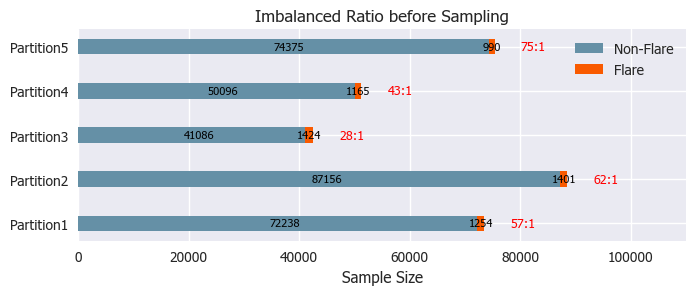

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'labels' is a list of dictionaries with 'FLARE_TYPE' as a key
# and the type of flare as values

flare_types = {"Non-Flare": [0,0,0,0,0], "Flare": [0,0,0,0,0]}
imbalanced = {1: [0,0], 2: [0,0], 3: [0,0], 4: [0,0], 5: [0,0]}

plt.style.use('seaborn-v0_8')

font = {'family': 'Tahoma',
        'weight': 'normal',
        'size': 8}

plt.rc('font', **font)

colors = ['#6590a6', '#f95a00']  # Colors for Flare and Non-Flare
group = ["Partition1", "Partition2", "Partition3", "Partition4", "Partition5"]

for i in range(1, 6):
    for j in labels[i-1]['FLARE_TYPE']:
        if "M" in j or "X" in j:
            flare_types["Flare"][i-1] += 1
            imbalanced[i][0] += 1
        elif "C" in j or "B" in j or "FQ" in j:
            flare_types["Non-Flare"][i-1] += 1
            imbalanced[i][1] += 1

fig, ax = plt.subplots(figsize=(7, 3))

left = np.zeros(len(group))

# Plotting the bars
for i, (key, val) in enumerate(flare_types.items()):
    ax.barh(group, val, height=0.35, left=left, label=key, color=colors[i])
    left += np.array(val)

# Annotating the bars with the imbalance ratio
offset = 0.1  # Increase this value to move the text further to the right
for i, (partition, counts) in enumerate(imbalanced.items()):
    total_flare = counts[0]
    total_non_flare = counts[1]
    ratio = f"{total_non_flare // total_flare if total_flare else 'inf'}:1"  # Avoid division by zero
    ax.text(left[i] + 7000, i, ratio, ha='center', va='center', weight='normal', size=9, color='red')


# Annotating the bars with the count for each category
for i, (key, val) in enumerate(flare_types.items()):
    for j, count in enumerate(val):
        if count > 0:  # If count is 0, we don't annotate
            ax.text(left[j] - count/2, j, f'{count:d}', ha='center', va='center', color='black')

ax.set_title("Imbalanced Ratio before Sampling")
ax.set_xlabel('Sample Size')
ax.set_yticklabels(group)
ax.set_yticks(np.arange(len(group)))
ax.set_xlim(0, 110000)

plt.tight_layout()

ax.legend()


plt.savefig('imbalance_binary.pdf')


plt.show()


In [23]:
import pickle
import pandas as pd

data_dir = "/Users/samskanderi/Documents/Research_Project/SWANSF/code/6_1_OUSampling_Concatenation_KnnImputation/"

Y_train_array = []

num_partitions = 5
for i in range(0, num_partitions):
    with open(data_dir + "RUS_Tomek_TimeGAN_" + "Partition" + str(i+1) + "_Labels_OUSampling_WithoutC_Concatenation_KnnImputation" +".pkl", 'rb') as f:
        Y_train_array.append(pickle.load(f))

/var/folders/fx/gjhbmrbj5jn295_9wrqpbsv80000gn/T/ipykernel_43984/1988292548.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(group)


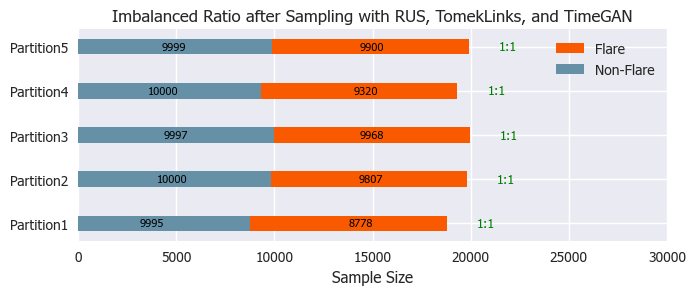

In [24]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

# Assuming 'labels' is a list of dictionaries with 'FLARE_TYPE' as a key
# and the type of flare as values

flare_types = {"Flare": [0,0,0,0,0], "Non-Flare": [0,0,0,0,0]}
imbalanced = {1: [0,0], 2: [0,0], 3: [0,0], 4: [0,0], 5: [0,0]}

plt.style.use('seaborn-v0_8')

font = {'family': 'Tahoma',
        'weight': 'normal',
        'size': 8}

plt.rc('font', **font)

colors = ['#6590a6', '#f95a00']  # Colors for Flare and Non-Flare

group = ["Partition1", "Partition2", "Partition3", "Partition4", "Partition5"]

for i in range(1, 6):
    for j in range(0, Y_train_array[i-1].shape[0]):
        if Y_train_array[i-1][j] == 1:
            flare_types["Flare"][i-1] += 1
            imbalanced[i][1] += 1
        elif Y_train_array[i-1][j] == 0:
            flare_types["Non-Flare"][i-1] += 1
            imbalanced[i][0] += 1
            
            

fig, ax = plt.subplots(figsize=(7, 3))

left = np.zeros(len(group))

# Plotting the bars
for i, (key, val) in enumerate(flare_types.items()):
    ax.barh(group, val, height=0.35, left=left, label=key, color=colors[i])
    left += np.array(val)

# Annotating the bars with the imbalance ratio
offset = 0.1  # Increase this value to move the text further to the right
for i, (partition, counts) in enumerate(imbalanced.items()):
    total_flare = counts[0]
    total_non_flare = counts[1]
    ratio = f"{round(total_non_flare / total_flare) if total_flare else 'inf'}:1"  # Avoid division by zero
    ax.text(left[i] + 2000, i, ratio, ha='center', va='center', weight='normal', size=9, color='green')


# Annotating the bars with the count for each category
for i, (key, val) in enumerate(flare_types.items()):
    if i ==0:
        dis = 1
    else:
        dis = 3
    for j, count in enumerate(val):
        if count > 0:  # If count is 0, we don't annotate
            ax.text(left[j] - dis*count/2, j, f'{count:d}', ha='center', va='center', color='black')

ax.set_title("Imbalanced Ratio after Sampling with RUS, TomekLinks, and TimeGAN")
ax.set_xlabel('Sample Size')
ax.set_yticklabels(group)
ax.set_yticks(np.arange(len(group)))
ax.set_xlim(0, 30000)

plt.tight_layout()


legend_elements = [
    Patch(facecolor=colors[1], label='Flare'),
    Patch(facecolor=colors[0], label='Non-Flare')
]

plt.legend(handles=legend_elements)



plt.savefig('imbalance_binary_ousampling.pdf')



plt.show()


In [25]:
import pickle
import pandas as pd

data_dir = "/Users/samskanderi/Documents/Research_Project/SWANSF/code/6_2_OSampling_Concatenation_KnnImputation/"

Y_train_array = []

num_partitions = 5
for i in range(0, num_partitions):
    with open(data_dir + "TimeGAN_" + "Partition" + str(i+1) + "_Labels_OSampling_WithoutC_Concatenation_KnnImputation" +".pkl", 'rb') as f:
        Y_train_array.append(pickle.load(f))

/var/folders/fx/gjhbmrbj5jn295_9wrqpbsv80000gn/T/ipykernel_43984/3886865159.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(group)


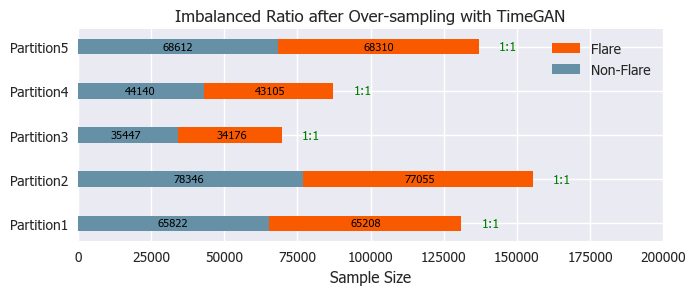

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'labels' is a list of dictionaries with 'FLARE_TYPE' as a key
# and the type of flare as values

flare_types = {"Flare": [0,0,0,0,0], "Non-Flare": [0,0,0,0,0]}
imbalanced = {1: [0,0], 2: [0,0], 3: [0,0], 4: [0,0], 5: [0,0]}

plt.style.use('seaborn-v0_8')

font = {'family': 'Tahoma',
        'weight': 'normal',
        'size': 8}

plt.rc('font', **font)

colors = ['#6590a6', '#f95a00']  # Colors for Flare and Non-Flare
group = ["Partition1", "Partition2", "Partition3", "Partition4", "Partition5"]

for i in range(1, 6):
    for j in range(0, Y_train_array[i-1].shape[0]):
        if Y_train_array[i-1][j] == 1:
            flare_types["Flare"][i-1] += 1
            imbalanced[i][1] += 1
        elif Y_train_array[i-1][j] == 0:
            flare_types["Non-Flare"][i-1] += 1
            imbalanced[i][0] += 1
            

fig, ax = plt.subplots(figsize=(7, 3))

left = np.zeros(len(group))

# Plotting the bars
for i, (key, val) in enumerate(flare_types.items()):
    ax.barh(group, val, height=0.35, left=left, label=key, color=colors[i])
    left += np.array(val)

# Annotating the bars with the imbalance ratio
offset = 0.1  # Increase this value to move the text further to the right
for i, (partition, counts) in enumerate(imbalanced.items()):
    total_flare = counts[0]
    total_non_flare = counts[1]
    ratio = f"{round(total_non_flare / total_flare) if total_flare else 'inf'}:1"  # Avoid division by zero
    ax.text(left[i] + 10000, i, ratio, ha='center', va='center', weight='normal', size=9, color='green')


# Annotating the bars with the count for each category
for i, (key, val) in enumerate(flare_types.items()):
    if i ==0:
        dis = 1
    else:
        dis = 3
    for j, count in enumerate(val):
        if count > 0:  # If count is 0, we don't annotate
            ax.text(left[j] - dis*count/2, j, f'{count:d}', ha='center', va='center', color='black')

ax.set_title("Imbalanced Ratio after Over-sampling with TimeGAN")
ax.set_xlabel('Sample Size')
ax.set_yticklabels(group)
ax.set_yticks(np.arange(len(group)))
ax.set_xlim(0, 200000)

plt.tight_layout()

legend_elements = [
    Patch(facecolor=colors[1], label='Flare'),
    Patch(facecolor=colors[0], label='Non-Flare')
]
plt.legend(handles=legend_elements)



plt.savefig('imbalance_binary_osampling.pdf')


plt.show()


# Attributes Visualization

In [1]:
import pickle
import numpy as np

data_dir = "/Users/samskanderi/Documents/Research_Project/SWANSF/code/5_4_FinalData_Concatenation_LSBZM_KnnImputation/"
X_train_NewF_LSBZM = []
Y_train_NewF_LSBZM = []


num_partitions = 5

for i in range(0,num_partitions):
    with open(data_dir + "Partition" + str(i+1) + "_Concatenation_LSBZM_KnnImputation" + ".pkl", 'rb') as f:
        X_train_NewF_LSBZM.append(pickle.load(f))
    print("P"+str(i+1)+" Nan-Value: "+ str(np.isnan(X_train_NewF_LSBZM[i]).any() or np.isinf(X_train_NewF_LSBZM[i]).any()))
    
    with open(data_dir + "Partition" + str(i+1) + "_Labels_Concatenation_LSBZM_KnnImputation" + ".pkl", 'rb') as f:
        Y_train_NewF_LSBZM.append(pickle.load(f))
    print(X_train_NewF_LSBZM[i].shape)

P1 Nan-Value: False
(73492, 1440)
P2 Nan-Value: False
(88557, 1440)
P3 Nan-Value: False
(42510, 1440)
P4 Nan-Value: False
(51261, 1440)
P5 Nan-Value: False
(75365, 1440)


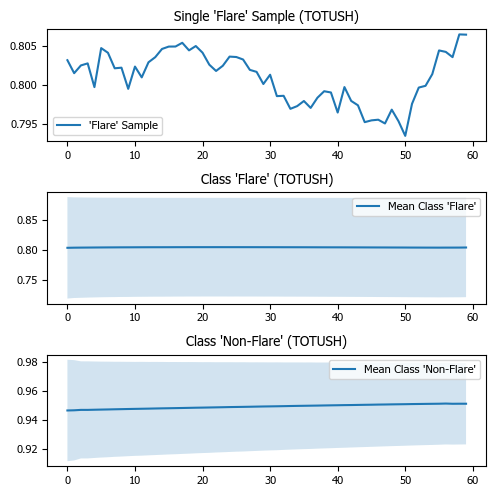

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

font = {'family': 'Tahoma',
        'weight': 'normal',
        'size': 8}

plt.rc('font', **font)

X_train = X_train_NewF_LSBZM[0][:,60:120]
Y_train = Y_train_NewF_LSBZM[0][:]

class_0 = X_train[Y_train == 0]
class_1 = X_train[Y_train == 1]

# Calculate means and standard deviations for each class
mean_0 = np.mean(class_0, axis=0)
std_0 = np.std(class_0, axis=0)

mean_1 = np.mean(class_1, axis=0)
std_1 = np.std(class_1, axis=0)

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(5, 5))



# Plot for class 1
axs[0].plot(X_train_NewF_LSBZM[0][0,60:120], label='\'Flare\' Sample')
axs[0].set_title('Single \'Flare\' Sample (TOTUSH)')
axs[0].legend()


# Plot for class 0
axs[1].plot(mean_0, label='Mean Class \'Flare\'')
axs[1].fill_between(range(len(mean_0)), mean_0 - std_0, mean_0 + std_0, alpha=0.2)
axs[1].set_title('Class \'Flare\' (TOTUSH)')
axs[1].legend()

# Plot for class 1
axs[2].plot(mean_1, label='Mean Class \'Non-Flare\'')
axs[2].fill_between(range(len(mean_1)), mean_1 - std_1, mean_1 + std_1, alpha=0.2)
axs[2].set_title('Class \'Non-Flare\' (TOTUSH)')
axs[2].legend()

plt.tight_layout()


plt.savefig('no_structure.pdf')

plt.show()
